In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from function_notebook_1 import *

In [3]:
df = pd.read_csv('../data/regularseason16.csv').drop('Unnamed: 0', axis = 1)

df2 = pd.read_csv('../data/postseason16.csv').drop(['Unnamed: 0','w_loc'], axis = 1)

In [4]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)

df2['w_loc_H'] = 0
df2['w_loc_N'] = 1

In [5]:
#train_test_split

X_train=df.drop('fav_win',axis=1)
X_test=df2.drop('fav_win',axis=1)
y_train=df['fav_win']
y_test = df2['fav_win']

X_train.shape, X_test.shape

((5163, 108), (67, 108))

In [6]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [8]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: sag
Mean Cross-Val Score: 0.8522310272631082
Train Mean Accuracy: 0.8638388533798179
Test Mean Accuracy: 0.7910447761194029
Recall Score: 0.9375
Precision Score: 0.8035714285714286
F1 Score: 0.8653846153846154


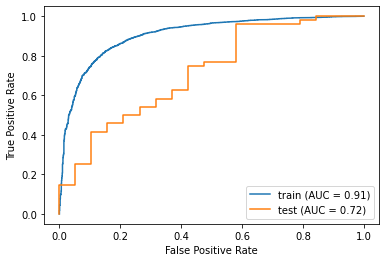

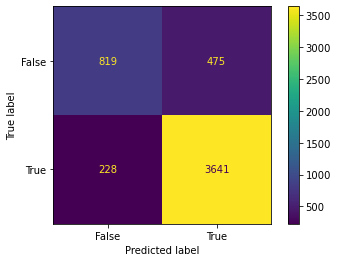

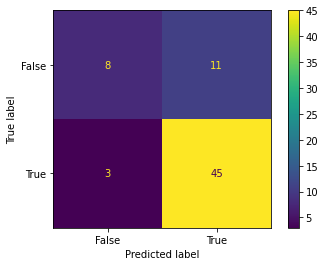

In [9]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [10]:
#knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [11]:
#dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [12]:
#X_train_best_dtree=X_train[dtree_feats]
#X_test_best_dtree=X_test[dtree_feats]

In [13]:
#dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [14]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 150
Criterion: entropy
Mean Cross-Val Score: 0.8588162347944198
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.7313432835820896
Recall Score: 0.8958333333333334
Precision Score: 0.7678571428571429
F1 score: 0.8269230769230769


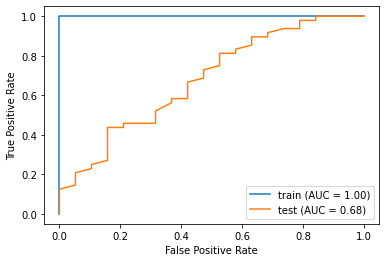

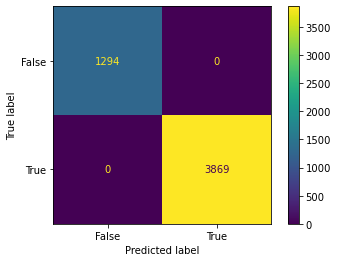

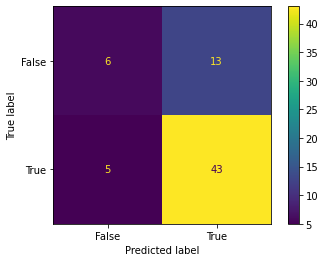

In [15]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [16]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.8704366374749544
Train Mean Accuracy Score: 0.9918651946542708
Test Mean Accuracy Score: 0.7910447761194029
Recall Score: 0.9375
Precision Score: 0.8035714285714286
F1 score: 0.8653846153846154


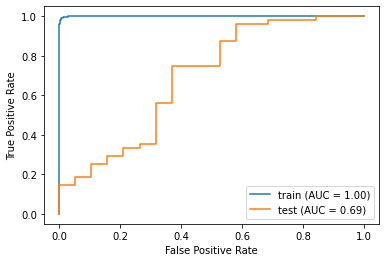

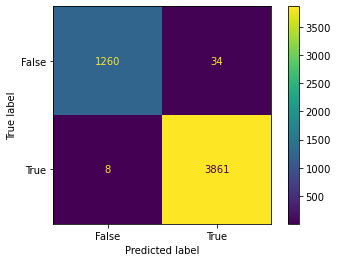

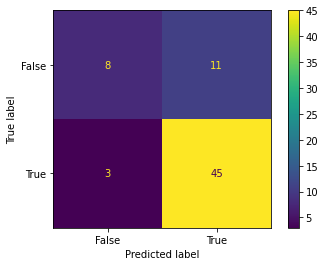

In [17]:
xgboost(X_train, X_test, y_train, y_test, cv=5)